<a href="https://colab.research.google.com/github/ambideXtrous9/PyTorch-Models/blob/main/Flickr27_logo_MobilenetV2_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## InceptionV3

![iv3.jpeg](attachment:9ac594fc-7625-4e5e-b510-2942b8aef403.jpeg)

In [1]:
!pip install imutils
!pip install wget
!pip install split-folders

from imutils import paths
import pandas as pd
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torch
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt
import splitfolders
from torch import nn
import numpy as np
import os
import wget
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=4cdfe292f64064cd8b35e60e710070dee0616ed8cdebf9d667b31251797f4bc6
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


## Downloading Dataset

In [2]:
_URL = 'http://image.ntua.gr/iva/datasets/flickr_logos/flickr_logos_27_dataset.tar.gz'
wget.download(_URL)

'flickr_logos_27_dataset.tar.gz'

In [3]:
!ls

flickr_logos_27_dataset.tar.gz	sample_data


In [4]:
zip_dir = tf.keras.utils.get_file('./logo', origin=_URL, untar=True,extract=True)

101842944/101827904 [==============================] - 3s 0us/step


In [5]:
import tarfile

fname = 'flickr_logos_27_dataset.tar.gz'

if fname.endswith("tar.gz"):
    tar = tarfile.open(fname, "r:gz")
    tar.extractall()
    tar.close()

In [6]:
fname = 'flickr_logos_27_dataset/flickr_logos_27_dataset_images.tar.gz'

if fname.endswith("tar.gz"):
    tar = tarfile.open(fname, "r:gz")
    tar.extractall()
    tar.close()

In [7]:
src_dir = "flickr_logos_27_dataset_images"
dest = "LOGOS"

if not os.path.exists(dest):
    os.makedirs(dest)

## Preprocessing

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv("flickr_logos_27_dataset/flickr_logos_27_dataset_training_set_annotation.txt", sep='\s+',header=None)

In [10]:
df

,0,1,2,3,4,5,6
0,144503924.jpg,Adidas,1,38,12,234,142
1,2451569770.jpg,Adidas,1,242,208,413,331
2,390321909.jpg,Adidas,1,13,5,89,60
3,4761260517.jpg,Adidas,1,43,122,358,354
4,4763210295.jpg,Adidas,1,83,63,130,93
...,...,...,...,...,...,...,...
4531,2126991906.jpg,Yahoo,6,15,6,253,54
4532,217288720.jpg,Yahoo,6,136,161,304,222
4533,2472817996.jpg,Yahoo,6,2,4,499,106
4534,2514220918.jpg,Yahoo,6,1,69,342,157


In [11]:
X = df.iloc[:,0]
Y = df.iloc[:,1]

In [12]:
dtdir = './flickr_logos_27_dataset_images/'

In [13]:
im = df[0][0]

In [14]:
size = df.iloc[:,3:]

In [15]:
size

,3,4,5,6
0,38,12,234,142
1,242,208,413,331
2,13,5,89,60
3,43,122,358,354
4,83,63,130,93
...,...,...,...,...
4531,15,6,253,54
4532,136,161,304,222
4533,2,4,499,106
4534,1,69,342,157


In [16]:
img = os.path.join(dtdir,im)

In [17]:
size = size.values.tolist()

In [18]:
size[0][0],size[0][1],size[0][2],size[0][3]

(38, 12, 234, 142)

(210, 280, 3)

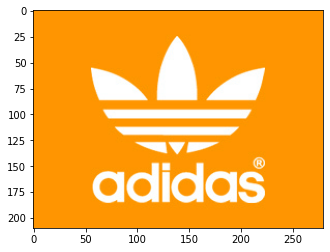

In [19]:
image = cv2.imread(img)
plt.imshow(image)
image.shape

(130, 196, 3)

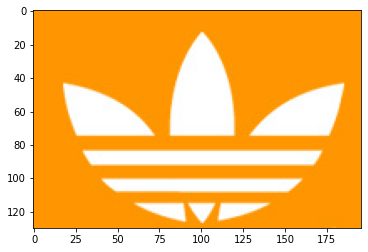

In [20]:
image = cv2.imread(img)
image = image[size[0][1]:size[0][3],size[0][0]:size[0][2]]
plt.imshow(image)
image.shape

In [21]:
query = pd.read_csv("./flickr_logos_27_dataset/flickr_logos_27_dataset_query_set_annotation.txt", sep='\s+',header=None)

In [22]:
query

,0,1
0,2403695909.jpg,Adidas
1,2912587920.jpg,Adidas
2,3441398196.jpg,Adidas
3,4605630935.jpg,Adidas
4,4606245138.jpg,Adidas
...,...,...
265,3480640208.jpg,none
266,3486224308.jpg,none
267,3486430785.jpg,none
268,3490185235.jpg,none


(500, 437, 3)

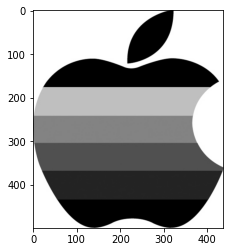

In [23]:
img = os.path.join(dtdir,query[0][5])
image = cv2.imread(img)
plt.imshow(image)
image.shape

In [24]:
testdist = 'TEST'

In [25]:
if not os.path.exists(testdist):
    os.makedirs(testdist)

In [26]:
y = list(set(list(Y)))
y.sort()

In [27]:
for i in y:
    os.makedirs(os.path.join(testdist,i))

In [28]:
for i in y:
    os.makedirs(os.path.join(dest,i))

In [29]:
distractor = pd.read_csv("./flickr_logos_27_dataset/flickr_logos_27_dataset_distractor_set_urls.txt", sep='\s+',header=None)

In [30]:
distractor

,0
0,http://farm2.static.flickr.com/1184/1013364004...
1,http://farm2.static.flickr.com/1108/1047095104...
2,http://farm2.static.flickr.com/1359/1076885577...
3,http://farm1.static.flickr.com/53/110432189_6d...
4,http://farm2.static.flickr.com/1144/1153048029...
...,...
4202,http://farm2.static.flickr.com/1254/889763557_...
4203,http://farm2.static.flickr.com/1308/901063602_...
4204,http://farm1.static.flickr.com/18/93551127_fed...
4205,http://farm2.static.flickr.com/1033/978252884_...


In [31]:
HEIGHT = 224
WIDTH =  224
BS = 256

## Removing Corrupt Images 

In [32]:
for i in range(len(X)):
    try:
        destrain = os.path.join(dest,Y[i])
        savepath = os.path.join(destrain,X[i])
        img  = os.path.join(dtdir,X[i])
        image = cv2.imread(img)
        image = image[size[i][1]:size[i][3],size[i][0]:size[i][2]]
        image = cv2.resize(image,(WIDTH,HEIGHT))
        cv2.imwrite(savepath,image)
    except:
        print('error')
        pass

error
error
error
error
error


In [33]:
A = query.iloc[:,0]
B = query.iloc[:,1]

In [34]:
A

0      2403695909.jpg
1      2912587920.jpg
2      3441398196.jpg
3      4605630935.jpg
4      4606245138.jpg
            ...      
265    3480640208.jpg
266    3486224308.jpg
267    3486430785.jpg
268    3490185235.jpg
269    3490913574.jpg
Name: 0, Length: 270, dtype: object

In [35]:

for i in range(len(A)):
    try:
        destrain = os.path.join(testdist,B[i])
        savepath = os.path.join(destrain,A[i])
        img  = os.path.join(dtdir,A[i])
        image = cv2.imread(img)
        image = cv2.resize(image,(WIDTH,HEIGHT))
        cv2.imwrite(savepath,image)
    except:
        print('error')
        pass


In [36]:
imagePaths = list(paths.list_images(testdist))

TEST/Pepsi/3162394630.jpg


(224, 224, 3)

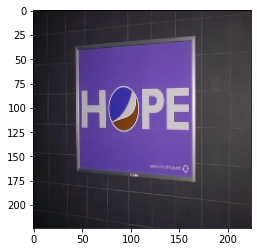

In [37]:
img = imagePaths[40]
print(img)
image = cv2.imread(img)
plt.imshow(image)
image.shape

## Train Val Split

In [38]:
path = 'LOGOS'

In [39]:
splitfolders.ratio(path, output="data", seed=1337, ratio=(0.8,0.2))

Copying files: 809 files [00:00, 4973.73 files/s]


## Image Augmentation

In [40]:
# initialize our data augmentation functions
resize = transforms.Resize(size=(WIDTH,HEIGHT))
hFlip = transforms.RandomHorizontalFlip(p=0.25)
vFlip = transforms.RandomVerticalFlip(p=0.25)
rotate = transforms.RandomRotation(degrees=15)
coljtr = transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.1, hue=0.1)
raf = transforms.RandomAffine(degrees=40, translate=None, scale=(1, 2), shear=15, resample=False, fillcolor=0)
rrsc = transforms.RandomResizedCrop(size=WIDTH, scale=(0.8, 1.0))
ccp  = transforms.CenterCrop(size=WIDTH)  # Image net standards
nrml = transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])  # Imagenet standards

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:1421: UserWarning: The parameter 'resample' is deprecated since 0.12 and will be removed in 0.14. Please use 'interpolation' instead.
  "The parameter 'resample' is deprecated since 0.12 and will be removed in 0.14. "
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:1436: UserWarning: The parameter 'fillcolor' is deprecated since 0.12 and will be removed in 0.14. Please use 'fill' instead.
  "The parameter 'fillcolor' is deprecated since 0.12 and will be removed in 0.14. "


In [41]:
# initialize our training and validation set data augmentation
# pipeline
trainTransforms = transforms.Compose([resize,hFlip,rotate,raf,transforms.ToTensor(),nrml])
valTransforms = transforms.Compose([resize,transforms.ToTensor(),nrml])

In [42]:
# initialize the training and validation dataset
print("[INFO] loading the training and validation dataset...")
trainDataset = ImageFolder(root='./data/train',transform=trainTransforms)
valDataset = ImageFolder(root='./data/val', transform=valTransforms)
print("[INFO] training dataset contains {} samples...".format(
        len(trainDataset)))
print("[INFO] validation dataset contains {} samples...".format(
        len(valDataset)))

[INFO] loading the training and validation dataset...
[INFO] training dataset contains 647 samples...
[INFO] validation dataset contains 162 samples...


In [43]:
# create training and validation set dataloaders
print("[INFO] creating training and validation set dataloaders...")
trainDataLoader = DataLoader(trainDataset, batch_size=BS, shuffle=True)
valDataLoader = DataLoader(valDataset, batch_size=BS,shuffle=True)

[INFO] creating training and validation set dataloaders...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


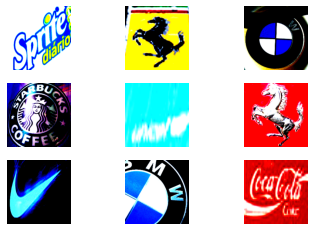

In [44]:
examples = iter(valDataLoader)
example_data, example_targets = examples.next()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(example_data[i].permute(1, 2, 0))
    plt.axis("off")
plt.show() 

In [45]:
import torchvision.models as models


In [46]:
print(trainDataset.class_to_idx)

{'Adidas': 0, 'Apple': 1, 'BMW': 2, 'Citroen': 3, 'Cocacola': 4, 'DHL': 5, 'Fedex': 6, 'Ferrari': 7, 'Ford': 8, 'Google': 9, 'HP': 10, 'Heineken': 11, 'Intel': 12, 'McDonalds': 13, 'Mini': 14, 'Nbc': 15, 'Nike': 16, 'Pepsi': 17, 'Porsche': 18, 'Puma': 19, 'RedBull': 20, 'Sprite': 21, 'Starbucks': 22, 'Texaco': 23, 'Unicef': 24, 'Vodafone': 25, 'Yahoo': 26}


## Model Architecture - InceptionV3

In [47]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [80]:
model = models.mobilenet_v2(pretrained=True)
model.aux_logits=False

# Freeze training for all layers
for param in model.parameters():
    param.requires_grad = False

# append a new classification top to our feature extractor and pop it
# on to the current device
num_feat = model.classifier[1].in_features

features = list(model.classifier.children())[:-1] # Remove last layer

features.extend([nn.Linear(num_feat, 256),
                 nn.Dropout(0.5),
                 nn.ReLU(inplace=True), 
                 nn.Linear(256, len(trainDataset.classes)),                   
                 nn.LogSoftmax(dim=1)]) # Add our layer with 4 outputs
model.classifier = nn.Sequential(*features) # Replace the model classifier

# model.classifier[1] = nn.Sequential(
#                       nn.Linear(model.classifier[1].in_features, 64), 
#                       nn.Dropout(0.5),
#                       nn.ReLU(inplace=True), 
#                       nn.Linear(64, len(trainDataset.classes)),                   
#                       nn.LogSoftmax(dim=1))
model = model.to(device)

## Loss Function and Optimizer

In [81]:
loss_func = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters())

## Train Function

In [82]:
def train(epoch):
  model.train()
  net_loss = 0
  correct = 0
  for batch_idx, (data, target) in enumerate(trainDataLoader):
    (data, target) = (data.to(device), target.to(device))
    optimizer.zero_grad()
    output = model(data)
    loss = loss_func(output, target)
    output = torch.exp(output)
    pred = output.data.max(1, keepdim=True)[1]
    correct += pred.eq(target.data.view_as(pred)).sum()
    loss.backward()
    optimizer.step()
    
    net_loss = net_loss + loss.item()
  acc = correct / len(trainDataLoader.dataset)
  return net_loss,acc

## Test Function

In [83]:
def test():
  model.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in valDataLoader:
      (data, target) = (data.to(device), target.to(device))
      output = model(data)
      test_loss += loss_func(output, target).item()
      output = torch.exp(output)
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(valDataLoader.dataset)
  acc = correct / len(valDataLoader.dataset)
  return test_loss,acc

## Driver Code

In [84]:
LOSS = []
ACC = []
import time
n_epochs = 200
for epoch in range(1, n_epochs + 1):
  start = time.time()
  print("--- Epoch {} ---".format(epoch))
  epoch_loss,tracc = train(epoch)
  LOSS.append(epoch_loss)
  print("\tTrain Accuracy = {} || Train Loss  = {} ".format(tracc,epoch_loss))
  tloss,tacc =  test()
  print("\tTest Accuracy =  {} || Test Loss = {} ".format(tacc,tloss))
  ACC.append(tacc)
  stop = time.time()
  print("\tTraining time = ", (stop - start))

--- Epoch 1 ---
	Train Accuracy = 0.04945904016494751 || Train Loss  = 9.885719060897827 
	Test Accuracy =  0.20370370149612427 || Test Loss = 0.019408686661425933 
	Training time =  4.689797878265381
--- Epoch 2 ---
	Train Accuracy = 0.17310664057731628 || Train Loss  = 9.101115226745605 
	Test Accuracy =  0.34567901492118835 || Test Loss = 0.018334504998760458 
	Training time =  4.48222804069519
--- Epoch 3 ---
	Train Accuracy = 0.3106645941734314 || Train Loss  = 8.392996072769165 
	Test Accuracy =  0.3827160596847534 || Test Loss = 0.017107255664872534 
	Training time =  4.467861652374268
--- Epoch 4 ---
	Train Accuracy = 0.3678516149520874 || Train Loss  = 7.590187311172485 
	Test Accuracy =  0.5555555820465088 || Test Loss = 0.01583106135144646 
	Training time =  4.491104364395142
--- Epoch 5 ---
	Train Accuracy = 0.45131373405456543 || Train Loss  = 6.832977056503296 
	Test Accuracy =  0.5740740895271301 || Test Loss = 0.014637209750987866 
	Training time =  4.519397974014282
--

## Accuracy - Loss Plot

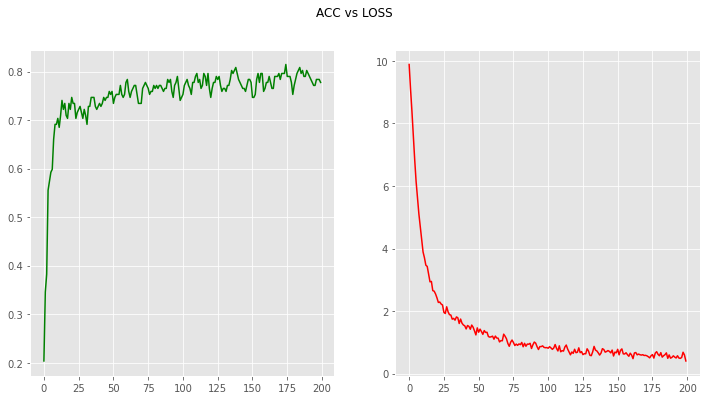

In [85]:
xx = np.arange(n_epochs)
plt.style.use("ggplot")
acc = torch.Tensor(ACC).detach().cpu().numpy()
lss = torch.Tensor(LOSS).detach().cpu().numpy()
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,6))
fig.suptitle('ACC vs LOSS')
ax1.plot(xx, acc, c='g')
ax2.plot(xx, lss, c='red')
plt.show()

## Prediction On Test Images

In [86]:
testimage = list(paths.list_images('./flickr_logos_27_dataset_images'))

In [87]:
def predimg(path):
    from PIL import Image
    image = Image.open(path)
    plt.imshow(image)
    plt.axis("off")
    plt.show() 
    model.eval()
    with torch.no_grad():
      img =  load_img(path,target_size=(WIDTH,HEIGHT))
      img = torch.from_numpy(np.asarray(img)).permute(2, 0, 1)
      img = img[None].to(device)
      output = model(img.float())
      output = torch.exp(output)
      print(output)
      index = output.data.cpu().numpy().argmax()
      print("PREDICTED CLASS = ",trainDataset.classes[index])

In [ ]:
predimg(testimage[300])